# Analysis of SRH VS CSK


In [191]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the DataSets
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

# Removing duplicates

In [203]:
# Check for Duplicate Rows 
duplicated1=data.duplicated()
print(duplicated1.sum())
duplicated2=deliveries.duplicated()
print(duplicated2.sum())
deliveries.drop_duplicates(inplace=True)
print(duplicated2.sum())
deliveries.columns

0
0
0


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [3]:
# Check for Data Set Deliveries
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [207]:
# Check the Shape of both the CSV files

print('Rows and columns of Matches Data Set is',data.shape)
print('Rows and columns of Deliveries Data Set is',deliveries.shape)


Rows and columns of Matches Data Set is (756, 18)
Rows and columns of Deliveries Data Set is (179055, 21)


In [208]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [209]:
#Chek for Delivery info
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [4]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

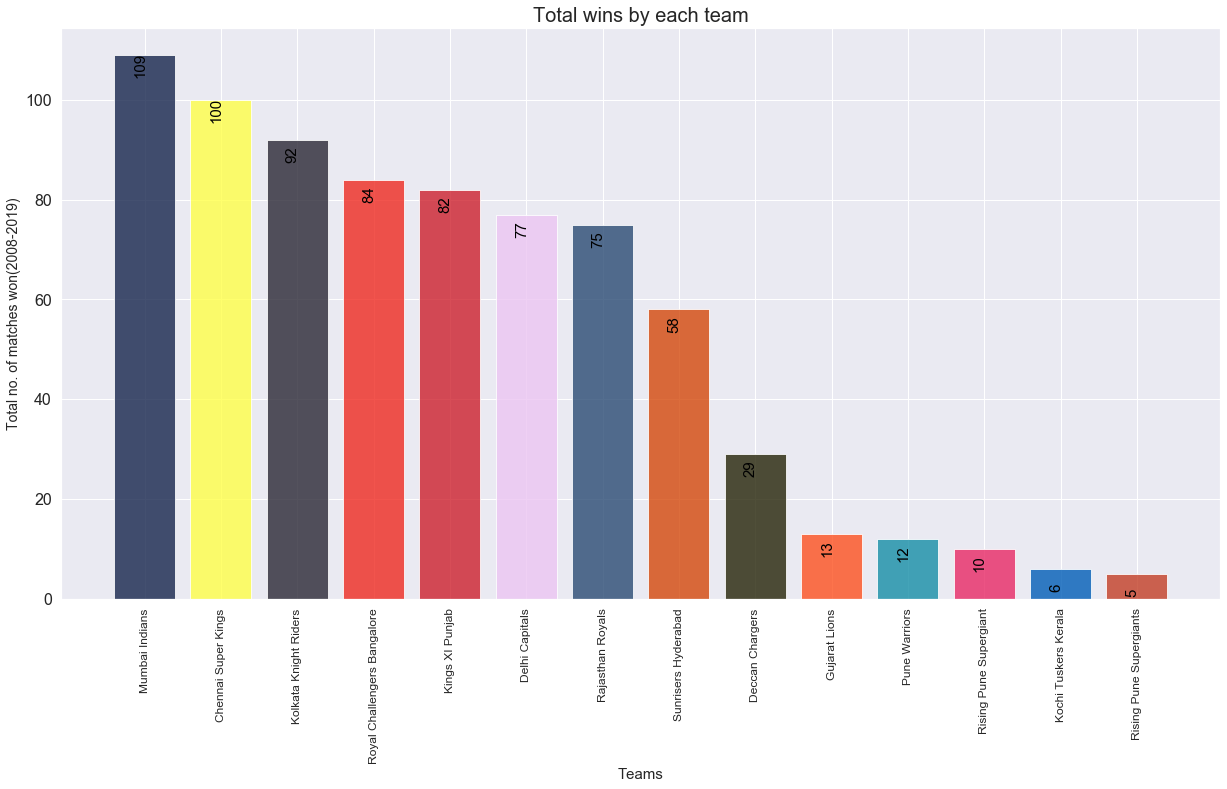

In [5]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

# MOM OF AWARDS

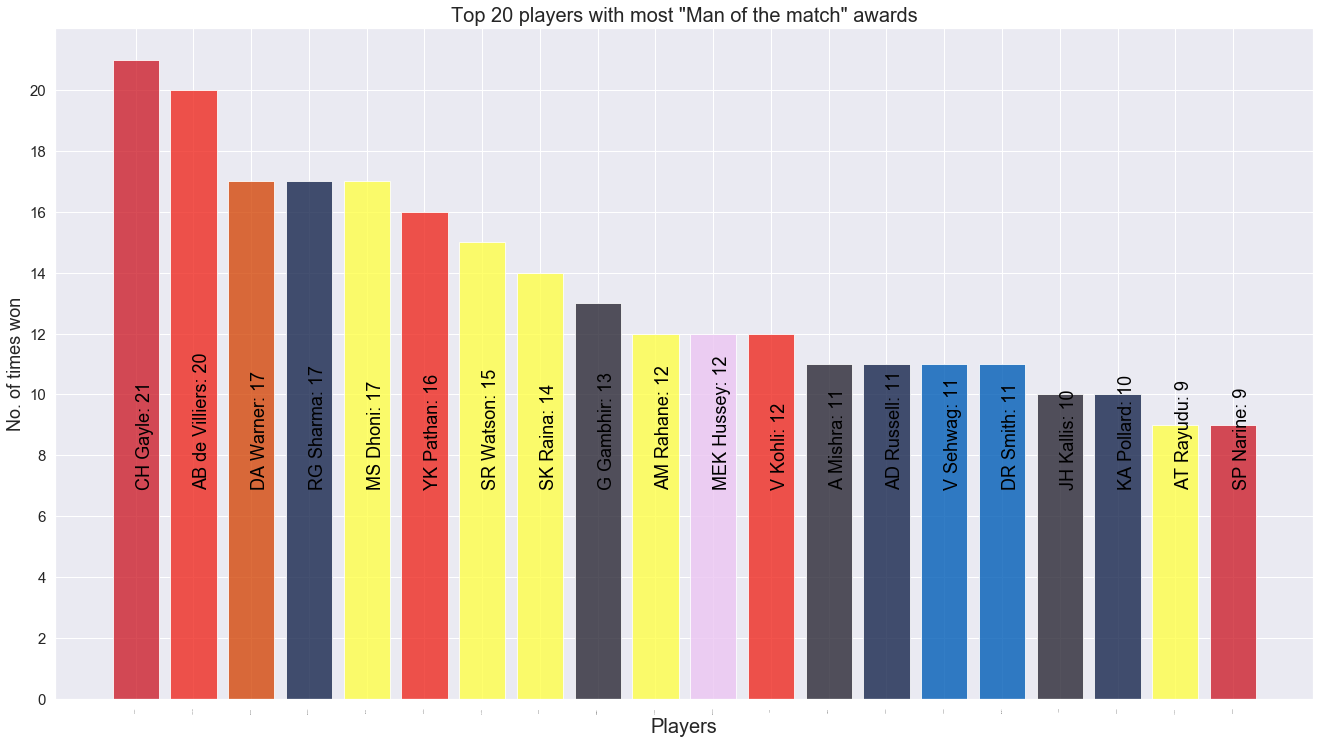

In [6]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [7]:
# Filter out Data for CSK & SRH
csksrh=data[np.logical_or(np.logical_and(data['team1']=='Chennai Super Kings',data['team2']=='Sunrisers Hyderabad'),np.logical_and(data['team2']=='Chennai Super Kings',data['team1']=='Sunrisers Hyderabad'))]
# Combined for RCB & KKR
csksrh_d= deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Chennai Super Kings',deliveries['bowling_team']=='Sunrisers Hyderabad'),np.logical_and(deliveries['bowling_team']=='Chennai Super Kings',deliveries['batting_team']=='Sunrisers Hyderabad'))]

In [10]:
# Check for any Duplicate Rows
duplicate = csksrh[csksrh.duplicated()]
duplicate
duplicate_D = csksrh_d[csksrh_d.duplicated()]
duplicate_D

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batsman, non_striker, bowler, is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs, batsman_runs, extra_runs, total_runs, player_dismissed, dismissal_kind, fielder]
Index: []

[0 rows x 21 columns]

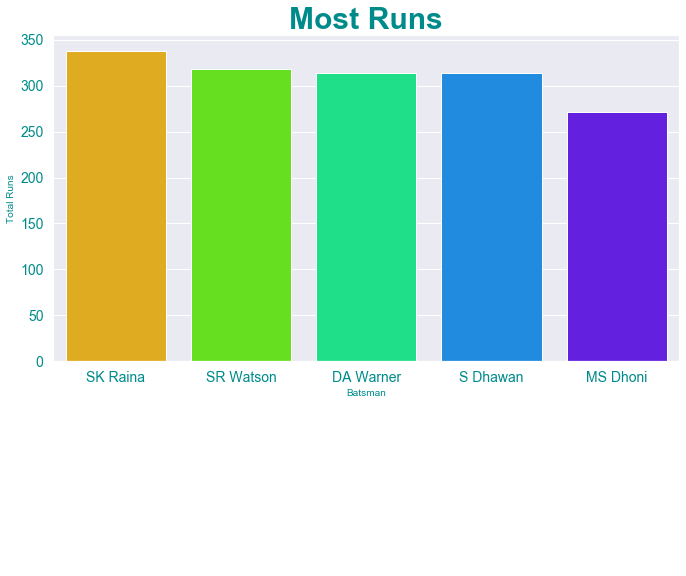

In [11]:
# Most Runs done by Players of both Teams CSk & SRH

#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = csksrh_d.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# Most Wickets Taken by Player from both the Teams

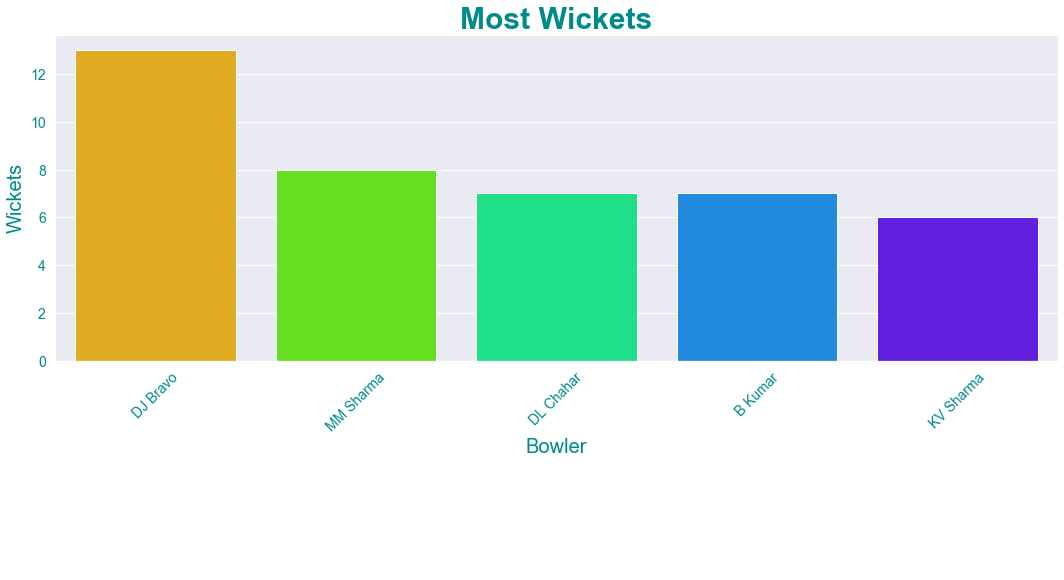

In [13]:
#the top Ten blower of RCB & KKR

#Create new dataframe
wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = csksrh_d[(csksrh_d['player_dismissed'].notnull()) & (~csksrh_d['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(5)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-15), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)


# Head to Head between CSK & SRH 

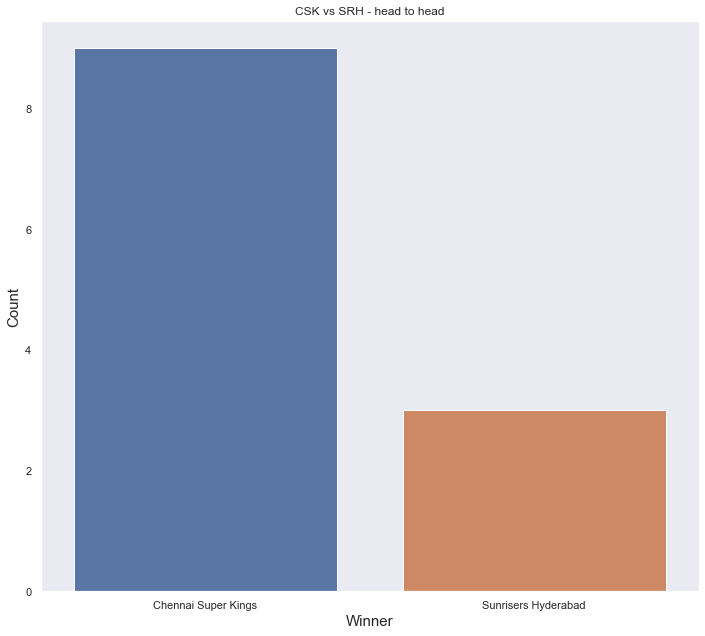

In [15]:
# RCB VS KKR head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(csksrh['winner'],order=csksrh['winner'].value_counts().index)
#plt.text(0.9,9,str(midc['winner'].value_counts()['Delhi Capitals']),size=29,color='white')
#plt.text(0.9,9,str(midc['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('CSK vs SRH - head to head')
plt.show()

In [19]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            

In [20]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Chennai Super Kings
field_count = 27
bat_count = 30
Win %age if fielding is choosen = 47.368421052631575
Win %age if batting is choosen = 52.63157894736842




In [21]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Sunrisers Hyderabad
field_count = 15
bat_count = 8
Win %age if fielding is choosen = 65.21739130434783
Win %age if batting is choosen = 34.78260869565217




# Chennai has more Chances of Winning the Matches against SRH if Chennai Won the toss and field First there is more Chance of Winning the Match

# Will See that Matches are Placed Outside India ,So to Check what is Record of Winning the Match Outside India i.e UAE

In [42]:
Venue =['MA Chidambaram Stadium, Chepauk',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sharjah Cricket Stadium', 'JSCA International Stadium Complex',
       'Maharashtra Cricket Association Stadium', 'Wankhede Stadium',
       'Rajiv Gandhi Intl. Cricket Stadium', 'M. A. Chidambaram Stadium']
# Only 1 venue is Outside India Where Currently match is currently Played lets See Percentage Of winning the Matches
UAE_Winner=csksrh.loc[csksrh['venue']=='Sharjah Cricket Stadium']
UAE_Winner['winner']


473    Chennai Super Kings
Name: winner, dtype: object

# In UAE only 1 match Played as of now as per Data,Chennai Super Kings have won bewteen both teams

In [48]:
data[data['venue']=='Sharjah Cricket Stadium'].groupby('winner').count()['result']

winner
Chennai Super Kings            1
Delhi Capitals                 1
Kings XI Punjab                2
Kolkata Knight Riders          1
Royal Challengers Bangalore    1
Name: result, dtype: int64

# Chennai Super Kings have only 1 played as per Data they Have won so CSK have more Chances of Winning it.

# CSK Losing Total no Of Wickets against SRH

In [90]:
dismissed=csksrh_d[(csksrh_d['player_dismissed'].notnull()) & (csksrh_d['batting_team'] == 'Chennai Super Kings' )]

In [103]:
table=pd.pivot_table(dismissed,index=["match_id","batting_team"],values=["player_dismissed"],aggfunc=[len])

In [104]:
table

len
                             player_dismissed
match_id batting_team                        
414      Chennai Super Kings                5
435      Chennai Super Kings                3
474      Chennai Super Kings                5
507      Chennai Super Kings                3
521      Chennai Super Kings                4
551      Chennai Super Kings                6
7913     Chennai Super Kings                3
7939     Chennai Super Kings                2
7950     Chennai Super Kings                8
7953     Chennai Super Kings                2
11324    Chennai Super Kings                5
11332    Chennai Super Kings                4

# Average CSK loosing the Wickets against SRH is around 4.16 aaprox ( 4 wickets)

# Total Runs by Both Teams against SRH vs CSK

In [145]:
# We Will USe Pivot Table or GRoup By to get Total Runs by both Teams CSk vs SRH
import numpy as np
Check = pd.DataFrame()
Total_Runs=pd.pivot_table(csksrh_d,index=["match_id"],values=["batsman_runs"],aggfunc=[np.sum])
Total_Runs
Check=csksrh_d.groupby('match_id').sum()['batsman_runs'].reset_index()
print('Average Runs by Both Team Score CSK vs SRH',np.mean(Check['batsman_runs']))

Average Runs by Both Team Score CSK vs SRH 330.5


# Average Runs by Both Team Score CSK vs SRH 330.5

In [ ]:
# Total Wide for Both the Teams CSK vs SRH

In [149]:
# Check for Unique Values
csksrh_d['wide_runs'].unique()

array([0, 1, 2], dtype=int64)

# We have Unique values for Wides as 0,1,2 We have to Considerd only 1,2 and for 2 Also it Signifies Batsman has run for Extra run so We have to Filter out Records for 2 first

In [166]:
Wide_Runs=csksrh_d[csksrh_d['wide_runs'].isin(['2'])]
Wide_Check=Wide_Runs.groupby('match_id').sum()['wide_runs'].reset_index()
Wide_Check

match_id  wide_runs
0       507          2

# Only 1 Record for 2 means 1 for white and 1 for Extra Run as it missed by Keeper

In [169]:
Wide_Runs=csksrh_d[csksrh_d['wide_runs'].isin(['1'])]
Wide_Check=Wide_Runs.groupby('match_id').sum()['wide_runs'].reset_index()
Wide_Check

match_id  wide_runs
0        414          7
1        435          9
2        474          3
3        507          2
4        521          8
5        551          7
6       7913          6
7       7939         11
8       7950         12
9       7953          9
10     11324          6
11     11332          5

# for Record 507 We have total 4 Wide_Runs but in Actual it is Just 3 Wides as 1 is Extra Runs

In [170]:
np.mean(Wide_Check['wide_runs'])

7.083333333333333

# So Team usually Gives 7 Wides across both the Teams

# David Warner Scores against CSK 

In [180]:
DAWarner=csksrh_d[csksrh_d['batsman']=='DA Warner']
DAWarner_Runs= DAWarner.groupby('match_id').sum()['batsman_runs'].reset_index()
print('Average Runs by DA Warner against CSK',np.mean(DAWarner_Runs['batsman_runs']))

Average Runs by DA Warner against CSK 52.333333333333336


# Average Runs by DA Warner against CSK 52.333333333333336

In [ ]:
# Conclusion as Per Data Provided
Q1)Which Team Will win the Match? CSK
Q2)How Many Wides bowled in the Match?7 
Q3)How Many Runs will David Warner Score?  52
Q4)How Many Wickets CSK loose in this Match? 4
Q5)How Many Runs Scores totally in the Match?330.5